In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import preprocessing
import keras

c:\ProgramData\Anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
header = 'filename chroma_stft_mean chroma_stft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean spectral_bandwidth_var rolloff_mean rolloff_var zero_crossing_rate_mean zero_crossing_rate_var harmony_mean harmony_var perc_mean perc_var tempo'
for i in range(1, 21):
    header += f' mfcc_m{i}'
    header += f' mfcc_v{i}'
header += ' label'
header = header.split()

In [3]:
file = open('data.csv', 'w', newline='', encoding='utf-8')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'DPP KMT ot'.split()
for g in genres:
    for filename in os.listdir(f'./{g}'):
        songname = f'./{g}/{filename}'
        y, sr = librosa.load(songname, offset=20, duration=30)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        harm, perc = librosa.effects.hpss(y=y)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        tempo = librosa.beat.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr), sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(harm)} {np.var(harm)} {np.mean(perc)} {np.var(perc)} {np.mean(tempo)} '    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            to_append += f' {np.var(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


In [3]:
data = pd.read_csv('data.csv', engine='python', encoding= 'unicode_escape')

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.31135072, 0.09564579])

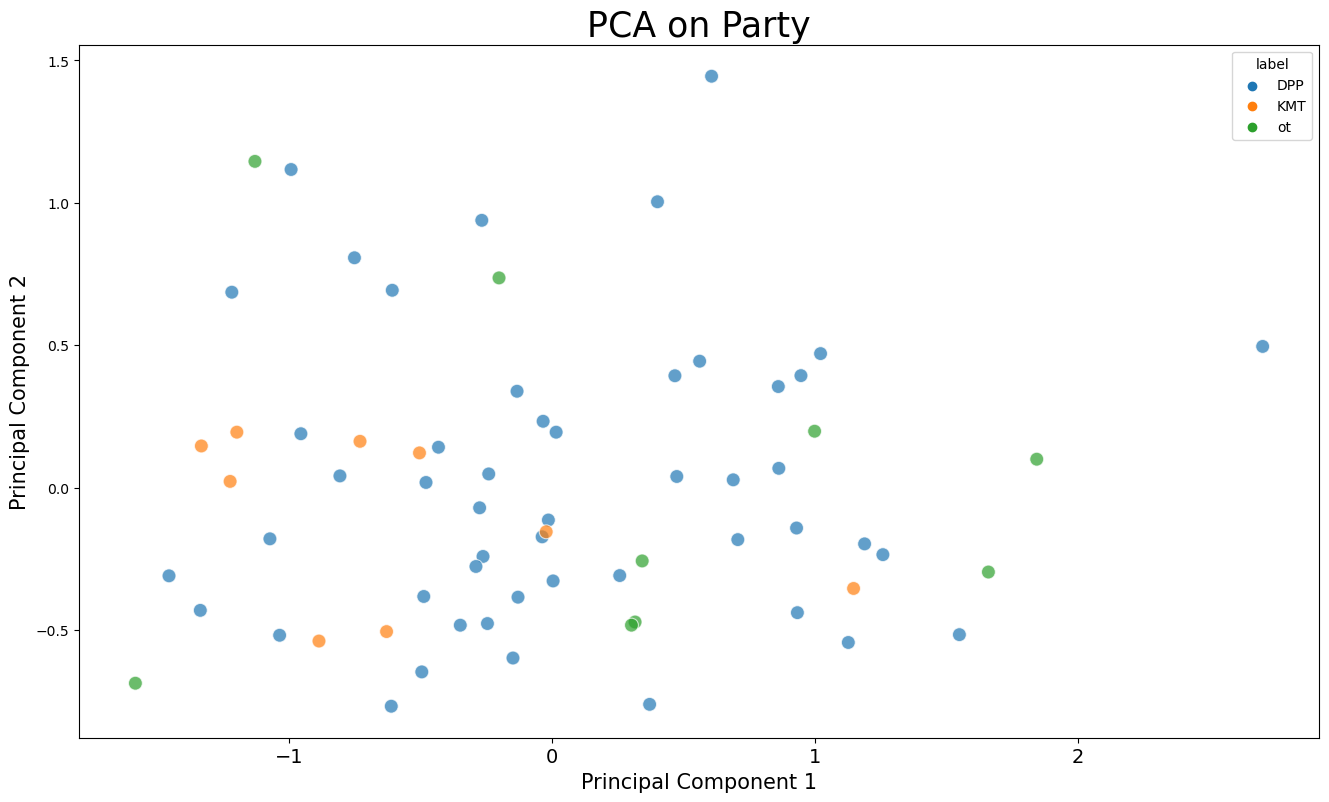

In [4]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Party', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [3]:
# 使用資料集：https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
file = open('genres.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18'.split()
for g in genres:
    for filename in os.listdir(f'Data/genres_original/{g}'):
        songname = f'Data/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        harm, perc = librosa.effects.hpss(y=y)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        tempo = librosa.beat.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr), sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(harm)} {np.var(harm)} {np.mean(perc)} {np.var(perc)} {np.mean(tempo)} '    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            to_append += f' {np.var(e)}'
        to_append += f' {g}'
        file = open('genres.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

C:\ProgramData\Anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)


In [12]:
gens = pd.read_csv('gen1.csv')
gens = gens.drop(['filename'],axis=1)
gens.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_v16,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20,label
0,0.349951,0.088752,0.130192,0.002830,1784.416546,129739.837401,2002.657106,85829.345908,3806.418650,9.013297e+05,...,52.464142,-1.688358,36.564606,-0.409329,41.643627,-2.298869,55.076675,1.219947,46.975636,blues
1,0.340945,0.094968,0.095892,0.002374,1529.871314,376011.650101,2038.612143,213889.873843,3548.986873,2.976792e+06,...,55.364292,-0.717028,60.113293,0.292333,48.137741,-0.285717,51.131210,0.532144,45.823231,blues
2,0.363562,0.085277,0.175494,0.002753,1552.637786,156538.294709,1747.382028,76150.688778,3041.089944,7.829465e+05,...,40.620197,-7.721793,47.700275,-1.816497,52.418175,-3.434353,46.630062,-2.231391,30.626228,blues
3,0.404848,0.094018,0.141139,0.006340,1070.110059,184506.655421,1596.244204,166637.568438,2185.061787,1.494194e+06,...,44.456993,-3.320055,50.236969,0.637263,37.351917,-0.617507,37.291168,-3.406940,31.988438,blues
4,0.308598,0.087850,0.091540,0.002305,1835.507009,343334.237041,1748.367477,88460.061228,3581.003346,1.572133e+06,...,86.012779,-5.453736,75.328178,-0.924468,53.577557,-4.408076,62.928513,-11.701833,55.215122,blues


In [3]:
data = pd.read_csv('data.csv', engine='python',encoding='big5')
data = data.loc[:, data.columns != 'label']
data = data.loc[:, data.columns != 'filename']
data.head()
# data = data.loc[:, data.columns != 'elected']

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_m16,mfcc_v16,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20
0,0.394348,0.082736,0.187303,0.002636,2027.753336,465728.775376,2384.902182,158256.983352,4609.447127,2.342579e+06,...,5.162564,33.651665,-7.632638,34.398056,4.250960,29.552462,-4.049319,36.560287,7.523615,31.007797
1,0.247862,0.096739,0.065292,0.003625,911.180420,371085.214683,1391.129503,194777.083229,1452.957881,2.008569e+06,...,-8.613462,49.655308,-11.837771,45.339993,-9.123933,67.561691,-9.687928,54.823238,-10.937412,49.034634
2,0.321568,0.086650,0.192275,0.001932,1676.871335,296504.064571,2319.140573,293402.616540,3734.969082,2.874746e+06,...,1.654681,70.394897,-11.104105,71.970177,2.071669,58.193909,-9.968556,61.364613,7.232199,94.498886
3,0.463061,0.072457,0.151951,0.002317,2250.595089,342455.606177,2499.455600,120018.411333,5009.636374,1.899786e+06,...,8.420456,31.409588,-8.140182,37.547031,3.875662,32.698120,-7.621252,35.362053,6.278444,31.491680
4,0.382109,0.088178,0.145296,0.001993,1711.388593,570728.570081,2209.595186,157175.525749,3625.994741,2.229186e+06,...,5.051611,51.880516,-8.220931,53.381664,1.796243,32.394936,-5.985637,47.040806,1.891108,45.603909


In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [13]:
X = gens.loc[:, gens.columns != 'label'] #select all columns but not the labels
genre_list = gens.iloc[:, -1].astype("string")
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#### NORMALIZE X ####

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [15]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.55 

Accuracy Stochastic Gradient Descent : 0.53 

Accuracy KNN : 0.625 

Accuracy Decission trees : 0.525 



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy Random Forest : 0.765 

Accuracy Support Vector Machine : 0.675 

Accuracy Logistic Regression : 0.655 



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets : 0.705 

Accuracy Cross Gradient Booster : 0.76 

Accuracy Cross Gradient Booster (Random Forest) : 0.705 



In [16]:
# Final model，以上述最高分的方式訓練模型
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
rforest.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=0)

In [17]:
preds = xgb.predict(data)
preds

array([8, 0, 8, 8, 8, 0, 0, 0, 4, 8, 8, 0, 8, 0, 8, 8, 4, 7, 4, 8, 0, 8,
       9, 0, 8, 8, 4, 0, 0, 9, 4, 8, 8, 8, 4, 8, 4, 0, 8, 8, 8, 4, 0, 8,
       0, 8, 0, 0, 0, 8, 0, 8, 8, 8, 4, 8, 8, 8, 8, 4, 8, 8, 8, 8, 4, 0,
       8, 8], dtype=int64)

In [18]:
songs = pd.read_csv('data.csv', engine='python', encoding='big5')
songs['predict'] = preds
songs

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20,label,predict
0,NowI'm27.wav,0.394348,0.082736,0.187303,0.002636,2027.753336,465728.775376,2384.902182,158256.983352,4609.447127,...,-7.632638,34.398056,4.250960,29.552462,-4.049319,36.560287,7.523615,31.007797,DPP,8
1,RoundAndRound.wav,0.247862,0.096739,0.065292,0.003625,911.180420,371085.214683,1391.129503,194777.083229,1452.957881,...,-11.837771,45.339993,-9.123933,67.561691,-9.687928,54.823238,-10.937412,49.034634,DPP,0
2,tmiun(編織).wav,0.321568,0.086650,0.192275,0.001932,1676.871335,296504.064571,2319.140573,293402.616540,3734.969082,...,-11.104105,71.970177,2.071669,58.193909,-9.968556,61.364613,7.232199,94.498886,DPP,8
3,世紀之約.wav,0.463061,0.072457,0.151951,0.002317,2250.595089,342455.606177,2499.455600,120018.411333,5009.636374,...,-8.140182,37.547031,3.875662,32.698120,-7.621252,35.362053,6.278444,31.491680,DPP,8
4,亮點.wav,0.382109,0.088178,0.145296,0.001993,1711.388593,570728.570081,2209.595186,157175.525749,3625.994741,...,-8.220931,53.381664,1.796243,32.394936,-5.985637,47.040806,1.891108,45.603909,DPP,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,一起找出路b.wav,0.371531,0.096810,0.033733,0.000476,1215.555317,918289.138431,1715.662772,322570.379945,2351.227449,...,-4.377090,80.849335,3.697409,91.046600,-5.547229,44.301399,-1.980140,62.701855,ot,8
64,人在做天在看.wav,0.350542,0.091004,0.147800,0.007986,2414.633913,867127.594504,2550.535091,204727.305757,5233.351688,...,-4.101485,64.339096,6.529541,107.906784,-4.266273,98.834091,-0.572415,56.423050,ot,4
65,幸福車站.wav,0.278780,0.092934,0.050061,0.001250,1076.132758,626131.507946,1310.664309,343299.282116,2006.321201,...,-9.053709,54.916378,-6.230194,66.308754,-11.385012,86.824219,-7.175885,84.581192,ot,0
66,有你有我.wav,0.395381,0.077377,0.138024,0.000571,2332.630319,88886.257566,2306.186401,26810.269716,4691.521631,...,-6.503997,47.402493,5.557994,32.244972,-6.730798,42.439342,4.933411,76.935127,ot,8


In [19]:
songs.to_csv('pred1.csv',index=False, encoding='big5')

In [ ]:
# 使用資料集： https://www.kaggle.com/datasets/asisheriberto/music-classification-wav?resource=download&select=TRAIN_V2
# 因資料集過於龐大，訓練的資料有經過隨機取樣
file = open('gen2.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = '0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18'.split()
for g in genres:
    for filename in os.listdir(f'TRAIN_V2/ex/{g}'):
        songname = f'TRAIN_V2/ex/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        harm, perc = librosa.effects.hpss(y=y)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        tempo = librosa.beat.tempo(onset_envelope=librosa.onset.onset_strength(y=y, sr=sr), sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.var(chroma_stft)} {np.mean(rmse)} {np.var(rmse)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(rolloff)} {np.var(rolloff)} {np.mean(zcr)} {np.var(zcr)} {np.mean(harm)} {np.var(harm)} {np.mean(perc)} {np.var(perc)} {np.mean(tempo)} '    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
            to_append += f' {np.var(e)}'
        to_append += f' {g}'
        file = open('gen2.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [22]:
gen2 = pd.read_csv('gen2.csv')
gen2.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc_v16,mfcc_m17,mfcc_v17,mfcc_m18,mfcc_v18,mfcc_m19,mfcc_v19,mfcc_m20,mfcc_v20,label
0,0.363976,0.094316,0.158165,0.004529,1397.449236,5.733042e+05,1928.759390,488413.517741,3067.157478,4.496101e+06,...,91.980400,-7.888590,54.247463,2.185705,52.526344,-5.735630,49.951160,-5.137081,74.407883,0
1,0.616947,0.058019,0.225839,0.004596,2222.024977,1.972605e+05,2732.300183,51117.938443,5540.777942,8.689828e+05,...,24.099827,-0.749285,31.302282,5.038293,23.975340,-0.338841,17.641521,5.277034,17.547216,0
2,0.536098,0.076307,0.205273,0.009197,3416.172489,1.531976e+06,2780.560705,356115.709212,6575.062819,4.705213e+06,...,44.790268,-0.547558,46.843739,8.742295,54.484936,-1.570768,47.550011,6.528649,43.876045,0
3,0.276641,0.096369,0.108081,0.001494,1525.928125,1.093302e+06,1657.370655,678510.743335,3263.055869,5.784580e+06,...,280.230225,-7.418976,224.549530,-14.368578,422.995728,-13.031813,158.102524,-18.510021,282.977356,0
4,0.371109,0.095987,0.239208,0.009399,2182.833589,1.166827e+06,2336.106301,622335.560386,4812.053758,5.178807e+06,...,80.321075,-0.984438,62.921432,5.861080,78.323837,3.155840,133.335876,5.113412,145.671890,0


In [26]:
X = gen2.loc[:, gen2.columns != 'label'] #select all columns but not the labels
genre_list = gen2.iloc[:, -1].astype("string")
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)
#### NORMALIZE X ####

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.2962 

Accuracy Stochastic Gradient Descent : 0.41148 



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy KNN : 0.5311 

Accuracy Decission trees : 0.76316 

Accuracy Random Forest : 0.5912 

Accuracy Support Vector Machine : 0.49471 



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Logistic Regression : 0.47323 



In [ ]:
# Final model，以上述最高分的方式訓練模型
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
xgb.fit(X, y)

In [ ]:
preds1 = xgb.predict(data)
preds1

In [ ]:
songs = pd.read_csv('data.csv', engine='python', encoding='big5')
songs['predict'] = preds1
song